# CiFAR 이미지 분류 모델 구현
---
- 데이터 : CiFAR

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from keras.datasets.cifar10 import load_data

## [1] 데이터 불러오기

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()

In [ ]:
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)

X_train.shape :  (50000, 32, 32, 3)
X_test.shape :  (10000, 32, 32, 3)


In [ ]:
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

y_train.shape :  (50000, 1)
y_test.shape :  (10000, 1)


In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

### [1-1] 이미지 출력해보기

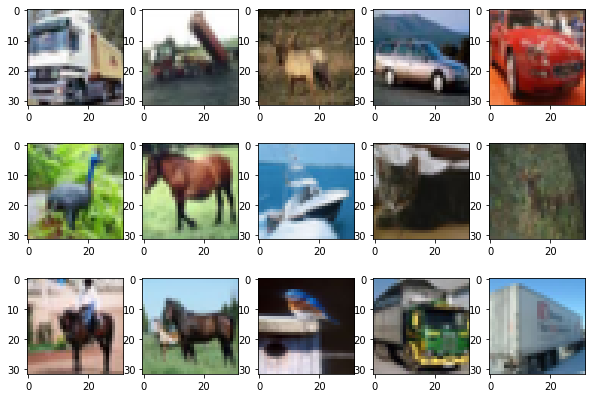

In [ ]:
plt.figure(figsize=(10, 7))

for i in range(1,16):
    plt.subplot(3,5,i)
    plt.imshow(X_train[i])

plt.show()

## [2] 모델 구성

In [ ]:
model = Sequential()

# 입력층
# 이미지 특징 추출
model.add(Conv2D(50, kernel_size=3, padding="same", activation='relu',input_shape=(32, 32, 3)))
model.add(Conv2D(50, kernel_size=3, padding="same", activation='relu'))
# 이미지 특징 다운샘플링
model.add(MaxPool2D())
model.add(Dropout(0.25))

# 이미지 특징 추출
model.add(Conv2D(100, kernel_size=3, padding="same", activation='relu'))
# 이미지 특징 다운샘플링
model.add(MaxPool2D())
model.add(Dropout(0.25))

# 이미지 특징 추출
model.add(Conv2D(200, kernel_size=3, padding="same", activation='relu'))
# 이미지 특징 다운샘플링
model.add(MaxPool2D())
model.add(Dropout(0.25))

# 이미지 특징 추출
model.add(Conv2D(400, kernel_size=3, padding="same", activation='relu'))
# 이미지 특징 다운샘플링
model.add(MaxPool2D())
model.add(Dropout(0.25))

# 1차원 변환
model.add(Flatten())

# 은닉층
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.5))

# 출력층
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 50)        1400      
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 50)        22550     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 50)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 16, 16, 50)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 100)       45100     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 8, 8, 100)        0         
 g2D)                                                 

## [3] 모델 생성

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

## [4] 모델 학습

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os

stop_cb = EarlyStopping(monitor="val_loss", patience=10)

In [ ]:
colab_path = '/content/drive/MyDrive/Colab Notebooks'
file_path = '/python-mldlnl/deep-learning/D_0915/inuk-CiFAR'
ckpt_path = colab_path + file_path + "/inuk-CiFAR.h5"

model_ckpt_cb = ModelCheckpoint(
    filepath=ckpt_path,
    save_best_only=True
    )

In [ ]:
model_history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=[model_ckpt_cb,stop_cb]
)

Epoch 1/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7300 - accuracy: 0.3515 - val_loss: 1.4472 - val_accuracy: 0.4635
Epoch 2/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3039 - accuracy: 0.5300 - val_loss: 1.0854 - val_accuracy: 0.6216
Epoch 3/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1343 - accuracy: 0.6001 - val_loss: 0.9563 - val_accuracy: 0.6686
Epoch 4/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0240 - accuracy: 0.6387 - val_loss: 0.8708 - val_accuracy: 0.6930
Epoch 5/100
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9508 - accuracy: 0.6690 - val_loss: 0.8525 - val_accuracy: 0.7001
Epoch 6/100
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9042 - accuracy: 0.6870 - val_loss: 0.8015 - val_accuracy: 0.7201
Epoch 7/100
1250/1250 [==============================] - 8s 6ms/step - loss: 0.8527 - accuracy: 0.7053 - val_loss: 0.8003 - val_ac

## [5] 모델 평가

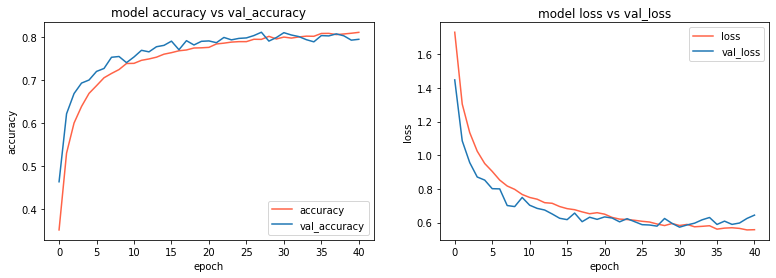

In [ ]:
plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
plt.title("model accuracy vs val_accuracy")
plt.plot(model_history.epoch, model_history.history["accuracy"], label="accuracy", color="tomato")
plt.plot(model_history.epoch, model_history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()


plt.subplot(1,2,2)
plt.title("model loss vs val_loss")
plt.plot(model_history.epoch, model_history.history["loss"], label="loss", color="tomato")
plt.plot(model_history.epoch, model_history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6699 - accuracy: 0.7831


[0.6698533892631531, 0.7831000089645386]